<a href="https://colab.research.google.com/github/sruthy-sn91/fake_news_detection/blob/main/Fake_news_ML_and_DL_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Data Preparation
## Load the dataset:

#### Import the necessary libraries 

In [2]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 78.4 MB/s eta 0:00:00


In [3]:
!pip install scikeras[tensorflow]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 51.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.7 requires jax>=0.4.6, but you have jax 0.3.25 which is incompatible.
flax 0.6.9 requires jax>=0.4.2, but you have jax 0.3.25 which is incompatible.
orbax-checkpoint 0.2.1 requires jax>=0.4.8, but you have jax 0.3.25 which is incompatible.


In [4]:
# Import libraries

import pandas as pd
import numpy as np
import re
import nltk
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Input
from tensorflow.keras.models import Model
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import SimpleRNN

nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#### Read the CSV file

In [5]:
%cd /content/drive/My Drive/Thesis

/content/drive/My Drive/Thesis


In [6]:
# Load the dataset
df = pd.read_csv('train_data.csv')
df

,id,title,text,label
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...,...,...
72027,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1
72028,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
72029,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0
72030,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1


There are 4 columns in the dataset, of which only the title and the label is used for this study. '0' in 'label' denotes 'Fake News' and '1' denotes 'True news'. Limiting the scope to 'title'(headlines) only, because of the time and computational constraints primarily.

In [7]:
# Dropping the columns 'id' and 'text'
df.drop(columns=['id','text'],inplace = True)

In [8]:
df

,title,label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1
...,...,...
72027,State Department says it can't find emails fro...,1
72028,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
72029,Anti-Trump Protesters Are Tools of the Oligarc...,0
72030,"In Ethiopia, Obama seeks progress on peace, se...",1


## Inspect the dataset
#### Check the shape, columns, data types, and basic statistics of the dataset.

In [9]:
df.shape

(72032, 2)

In [10]:
df.dtypes

title    object
label     int64
dtype: object

In [11]:
df['label'].value_counts()

0    47444
1    24588
Name: label, dtype: int64

'label' attribute has two unique values, '0' and '1', denoting 'Fake News' and 'True News' respectively.

#### Look for any missing values or inconsistencies that need to be addressed.

In [12]:
df.isnull().sum()

title    558
label      0
dtype: int64

There are 558 null values in the 'title' column. Since there are only two columns in the dataset, the rows with null values have to be removed

## Handle missing values:
#### Dropping rows/columns

In [13]:
# Dropping all the rows with null values
df = df.dropna()
df.isnull().sum()

title    0
label    0
dtype: int64

## Text preprocessing

Creating a function for preprocessing the text. This function includes code for converting the text to lowercase, removing any numbers and punctuations and replacing them with a single space, converting the text to tokens, removing all the stopwords and joining the tokens back into a string. 
This snippet is bound as a function so that further studies can include the 'text' column also and the same function can be reused.

In [14]:
def preprocess(text):
  if isinstance(text, str):
    # Convert to lowercase
    text = text.lower()
    # Remove numbers and punctuation
    text = re.sub(r'[^\w\s]|[\d]', '', text)
    text = re.sub(r'\d+', '', text)
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Join the tokens back into a string
    text = ' '.join(tokens)
    return text

In [15]:
# Applying the preprocessing to the 'title' column using apply() method
df['title'] = df['title'].apply(preprocess)

<ipython-input-15-add41be75acf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'] = df['title'].apply(preprocess)


## Split the dataset

In [16]:
# Splitting the dataset into dependent and target data
X = df['title'] 
y = df['label']

In [17]:
X

0        us budget fight looms republicans flip fiscal ...
1        us military accept transgender recruits monday...
2          senior us republican senator let mr mueller job
3        fbi russia probe helped australian diplomat ti...
4        trump wants postal service charge much amazon ...
                               ...                        
72027    state department says cant find emails clinton...
72028                     p pbs stand plutocratic pentagon
72029     antitrump protesters tools oligarchy information
72030    ethiopia obama seeks progress peace security e...
72031      jeb bush suddenly attacking trump heres matters
Name: title, Length: 71474, dtype: object

In [18]:
y

0        1
1        1
2        1
3        1
4        1
        ..
72027    1
72028    0
72029    0
72030    1
72031    1
Name: label, Length: 71474, dtype: int64

In [19]:
# Splitting the dataset into train and test datasets (80:20 split). 'stratify' parameter will ensure that the same proportion of data is maintained in the split datasets as in the original one.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
X_train

33947    wow fbi asst director used kill people like hi...
21391    romanian president opposes plans judicial over...
3399     russia probe grinds trump struggles gain tract...
32868    college students wanted pay education make stu...
38816    unreal republican senate confirms eric holder ...
                               ...                        
24173    trump got eightyearold american girl killed al...
8225     us lawmakers press aol powells state departmen...
31942    sarah huckabee sanders calls fake newsreporter...
25981    michigan republicans strip flint power sue sta...
41077    obamas communist crony van jones worries hell ...
Name: title, Length: 57179, dtype: object

In [21]:
X_test

59755    white house objects drudge criticism gop needs...
51067    us attempt simulated north korean icbm interce...
23053    trumps favorite new dictator cut access wikipedia
45137    report megyn kelly kick nbc show kardashian fa...
12378    supporters egypt presidential hopeful arrested...
                               ...                        
52523    cruise ship miami docks cuba ending decadesold...
44567    anarchy design antitrump flash mobs hollywood ...
26521    convicted felon gun kneejerk reaction kills da...
30004    psychic apparently couldnt predict lawsuit she...
71731               sufism service empire case maryamiyyah
Name: title, Length: 14295, dtype: object

In [22]:
y_train

33947    0
21391    1
3399     1
32868    0
38816    0
        ..
24173    0
8225     1
31942    0
25981    0
41077    0
Name: label, Length: 57179, dtype: int64

In [23]:
y_test

59755    0
51067    0
23053    0
45137    0
12378    1
        ..
52523    0
44567    0
26521    0
30004    0
71731    0
Name: label, Length: 14295, dtype: int64

# Feature Extraction

In [24]:
# Function to convert the tokenized text into a TF-IDF (Term Frequency - Inverse Document Frequency) matrix form
def tfidf_vectorizer(X_train, X_test):
    vectorizer = TfidfVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    return X_train_vec, X_test_vec

## Apply these functions to the preprocessed text data (X_train and X_test) and obtain the transformed feature representations

In [25]:
# Applying the tfidf vectorizer to the train and test X data splits
X_train_tfidf, X_test_tfidf = tfidf_vectorizer(X_train, X_test)

In [26]:
X_train_tfidf


<57179x33560 sparse matrix of type '<class 'numpy.float64'>'
	with 505883 stored elements in Compressed Sparse Row format>

# Machine Learning Models

##With Hyperparameter tuning

#### Logistic Regression

Logistic Regression

In [ ]:
# Creating a logistic regression classifier object lr with a maximum iteration of 1000
lr = LogisticRegression(max_iter=1000)

# A parameter grid for the C hyperparameter is created, which is the inverse of the regularization strength. 
# Three different values of C are specified to be tested: 0.1, 1, and 10.
param_grid_lr = {'C': [0.1, 1, 10]}

# GridSearchCV is used to search for the best combination of hyperparameters using 5-fold cross-validation (cv=5) on the training set
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5)
grid_lr.fit(X_train_tfidf, y_train)
# The best hyperparameters found by GridSearchCV are printed.
print("Best parameters for Logistic Regression: ", grid_lr.best_params_)

# The best logistic regression classifier found by GridSearchCV is used to predict the labels of the training set and the test set.
pred_train_lr = grid_lr.predict(X_train_tfidf)
pred_test_lr = grid_lr.predict(X_test_tfidf)

# The accuracy scores of the training and test sets 
train_score_lr = accuracy_score(pred_train_lr, y_train)
test_score_lr = accuracy_score(pred_test_lr, y_test)

# The classification report, which includes precision, recall, f1-score, and support for each class, is printed for the test set.
print("Logistic Regression classification report:\n", classification_report(y_test, pred_test_lr))
print("Logistic Regression train accuracy:", train_score_lr)
print("Logistic Regression test accuracy:", test_score_lr)

Best parameters for Logistic Regression:  {'C': 10}
Logistic Regression classification report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      9377
           1       0.89      0.86      0.87      4918

    accuracy                           0.91     14295
   macro avg       0.91      0.90      0.90     14295
weighted avg       0.91      0.91      0.91     14295

Logistic Regression train accuracy: 0.9702862939190962
Logistic Regression test accuracy: 0.9148653375306051


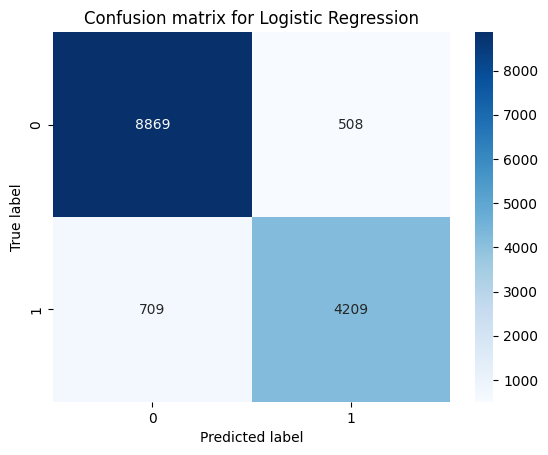

In [ ]:
# A confusion matrix is calculated for the test set predictions and true labels using confusion_matrix.
# The confusion matrix is plotted as a heatmap using seaborn and matplotlib.

cm_lr = confusion_matrix(y_test, pred_test_lr)

# Plot confusion matrix as heatmap
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d')
# The title, x-label, and y-label of the confusion matrix plot are set and the plot is displayed using plt.show()
plt.title('Confusion matrix for Logistic Regression')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#### Decision Tree

In [ ]:
# Creating a decision tree classifier object dt
dt = DecisionTreeClassifier()

# A parameter grid for the max_depth hyperparameter is created, which specifies the maximum depth of the decision tree. 
# Three different values of max_depth are specified to be tested: 4, 10, and 50.
param_grid_dt = {'max_depth': [4, 10, 50]}

# GridSearchCV to search for the best combination of hyperparameters using 5-fold cross-validation (cv=5) on the training set
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5)
grid_dt.fit(X_train_tfidf, y_train)
print("Best parameters for Decision Tree: ", grid_dt.best_params_)

# The best decision tree classifier found by GridSearchCV is used to predict the labels of the training set and the test set.
pred_train_dt = grid_dt.predict(X_train_tfidf)
pred_test_dt = grid_dt.predict(X_test_tfidf)

# The classification report, which includes precision, recall, f1-score, and support for each class, is printed for the test set.
print("Decision Tree classification report:\n", classification_report(y_test, pred_test_dt))

# The accuracy scores of the training and test sets
train_score_dt = accuracy_score(pred_train_dt, y_train)
test_score_dt = accuracy_score(pred_test_dt, y_test)

print("Decision Tree train accuracy:", train_score_dt)
print("Decision Tree test accuracy:", test_score_dt)

Best parameters for Decision Tree:  {'max_depth': 50}
Decision Tree classification report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.87      9377
           1       0.82      0.63      0.71      4918

    accuracy                           0.83     14295
   macro avg       0.82      0.78      0.79     14295
weighted avg       0.83      0.83      0.82     14295

Decision Tree train accuracy: 0.8742895118837335
Decision Tree test accuracy: 0.8257432668765302


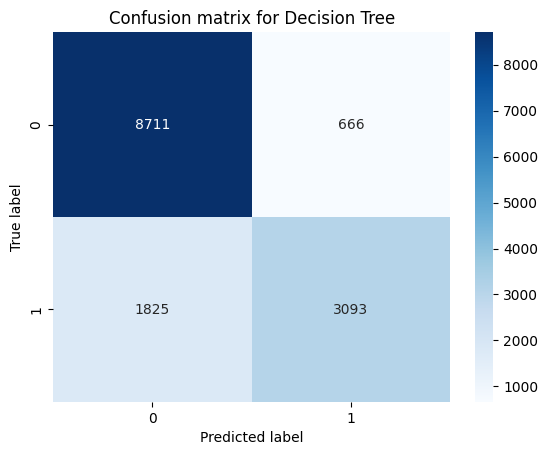

In [ ]:
# Confusion matrix for the test set predictions and true labels
cm_dt = confusion_matrix(y_test, pred_test_dt)

# Plot confusion matrix as heatmap using seaborn and matplotlib.
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion matrix for Decision Tree')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#### Gradient Boosting

In [ ]:
# Creating a Gradient Boosting classifier object gb
gb = GradientBoostingClassifier(random_state=0)

# A parameter grid is created for the n_estimators and learning_rate hyperparameters. 
# Three different values of n_estimators (100, 200, 300) and three different values of learning_rate (0.1, 0.05, 0.01) are specified to be tested.
param_grid_gb = {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05, 0.01]}

# GridSearchCV to search for the best combination of hyperparameters using 5-fold cross-validation (cv=5) on the training set
grid_gb = GridSearchCV(gb, param_grid_gb, cv=5)
grid_gb.fit(X_train_tfidf, y_train)
print("Best parameters for Gradient Boosting: ", grid_gb.best_params_)

# The best gradient boosting classifier found by GridSearchCV to predict the labels of the training set and the test set
pred_train_gb = grid_gb.predict(X_train_tfidf)
pred_test_gb = grid_gb.predict(X_test_tfidf)

# The classification report, which includes precision, recall, f1-score, and support for each class, is printed for the test set
print("Gradient Boosting classification report:\n", classification_report(y_test, pred_test_gb))

# The accuracy scores of the training and test sets
train_score_gb = accuracy_score(pred_train_gb, y_train)
test_score_gb = accuracy_score(pred_test_gb, y_test)
print("Gradient Boosting train accuracy:", train_score_gb)
print("Gradient Boosting test accuracy:", test_score_gb)

Best parameters for Gradient Boosting:  {'learning_rate': 0.1, 'n_estimators': 300}
Gradient Boosting classification report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.88      9377
           1       0.86      0.63      0.73      4918

    accuracy                           0.84     14295
   macro avg       0.85      0.79      0.81     14295
weighted avg       0.84      0.84      0.83     14295

Gradient Boosting train accuracy: 0.8484583500935658
Gradient Boosting test accuracy: 0.8380552640783491


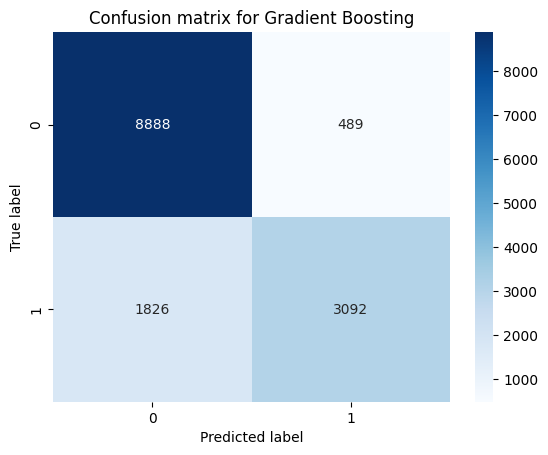

In [ ]:
# Confusion matrix for the test set predictions and true labels
cm_gb = confusion_matrix(y_test, pred_test_gb)

# Plot confusion matrix as heatmap
sns.heatmap(cm_gb, annot=True, cmap='Blues', fmt='d')
# The title, x-label, and y-label of the confusion matrix plot are set and the plot is displayed using plt.show()
plt.title('Confusion matrix for Gradient Boosting')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#### Random Forest

In [ ]:
# Creating a Random Forest classifier object rf
rf = RandomForestClassifier(random_state=0)

# A parameter grid is created for the n_estimators and learning_rate hyperparameters. 
# Three different values of n_estimators (100, 200, 300) and three different values of learning_rate (0.1, 0.05, 0.01) are specified to be tested.
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [4, 10, 50]}

# GridSearchCV to search for the best combination of hyperparameters using 5-fold cross-validation (cv=5) on the training set
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5)

grid_rf.fit(X_train_tfidf, y_train)
print("Best parameters for Random Forest: ", grid_rf.best_params_)

# The best Random Forest classifier found by GridSearchCV to predict the labels of the training set and the test set
pred_train_rf = grid_rf.predict(X_train_tfidf)
pred_test_rf = grid_rf.predict(X_test_tfidf)

# The classification report, which includes precision, recall, f1-score, and support for each class, is printed for the test set
print("Random Forest classification report:\n", classification_report(y_test, pred_test_rf))

# The accuracy scores of the training and test sets
train_score_rf = accuracy_score(pred_train_rf, y_train)
test_score_rf = accuracy_score(pred_test_rf, y_test)

print("Random Forest train accuracy:", train_score_rf)
print("Random Forest test accuracy:", test_score_rf)

Best parameters for Random Forest:  {'max_depth': 50, 'n_estimators': 100}
Random Forest classification report:
               precision    recall  f1-score   support

           0       0.77      0.99      0.87      9377
           1       0.95      0.44      0.60      4918

    accuracy                           0.80     14295
   macro avg       0.86      0.71      0.73     14295
weighted avg       0.83      0.80      0.77     14295

Random Forest train accuracy: 0.8193917347277847
Random Forest test accuracy: 0.7988107729975515


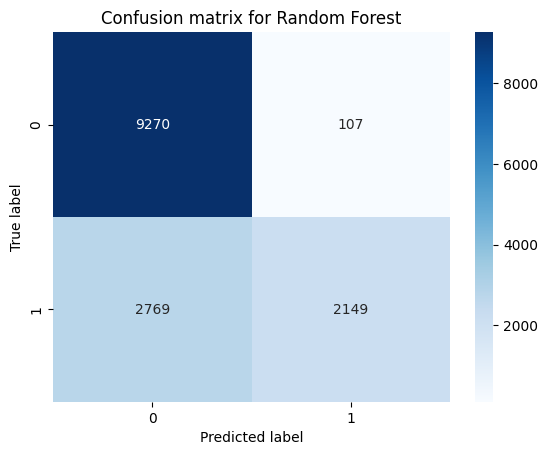

In [ ]:
# Confusion matrix for the test set predictions and true labels
cm_rf = confusion_matrix(y_test, pred_test_rf)

# Plot confusion matrix as heatmap
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d')
# The title, x-label, and y-label of the confusion matrix plot are set and the plot is displayed using plt.show()
plt.title('Confusion matrix for Random Forest')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#### Multinomial NB

Even though MNB is designed for multiclass classification, it can work well for binary classification tasks because it can handle sparse data, which is common in text classification. In addition, MNB is fast and requires relatively little training data compared to other algorithms, which makes it a popular choice for text classification tasks.

In [ ]:
# Creating a Multinomial Naive Bayes classifier object mnb
mnb = MultinomialNB()

# A parameter grid for the alpha hyperparameter is created, which is the smoothing parameter
# Three different values of alpha are specified to be tested: 0.1, 1, and 10.
param_grid_mnb = {'alpha': [0.1, 1, 10]}

# GridSearchCV to search for the best combination of hyperparameters using 5-fold cross-validation (cv=5) on the training set
grid_mnb = GridSearchCV(mnb, param_grid_mnb, cv=5)
grid_mnb.fit(X_train_tfidf, y_train)
print("Best parameters for Multinomial NB: ", grid_mnb.best_params_)

# The best multinomial Naive Bayes classifier found by GridSearchCV used to predict the labels of the training set and the test set
pred_train_mnb = grid_mnb.predict(X_train_tfidf)
pred_test_mnb = grid_mnb.predict(X_test_tfidf)

# The classification report, which includes precision, recall, f1-score, and support for each class, is printed for the test set
print("Multinomial NB classification report:\n", classification_report(y_test, pred_test_mnb))

# The accuracy scores of the training and test sets
train_score_mnb = accuracy_score(pred_train_mnb, y_train)
test_score_mnb = accuracy_score(pred_test_mnb, y_test)

print("Multinomial NB train accuracy:", train_score_mnb)
print("Multinomial NB test accuracy:", test_score_mnb)

Best parameters for Multinomial NB:  {'alpha': 0.1}
Multinomial NB classification report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      9377
           1       0.87      0.79      0.83      4918

    accuracy                           0.89     14295
   macro avg       0.88      0.86      0.87     14295
weighted avg       0.89      0.89      0.89     14295

Multinomial NB train accuracy: 0.9295895346193532
Multinomial NB test accuracy: 0.8884924798880728


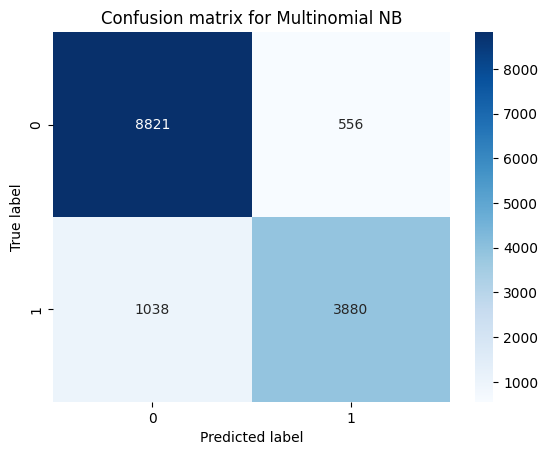

In [ ]:
# Confusion matrix for the test set predictions and true labels
cm_mnb = confusion_matrix(y_test, pred_test_mnb)

# Plot confusion matrix as heatmap
sns.heatmap(cm_mnb, annot=True, cmap='Blues', fmt='d')
# The title, x-label, and y-label of the confusion matrix plot are set and the plot is displayed using plt.show()
plt.title('Confusion matrix for Multinomial NB')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#### Passive Aggressive Classifier

In [ ]:
# Creating a Passive Aggressive Classifier object pac
pac = PassiveAggressiveClassifier()

# A parameter grid for the C hyperparameter is created, which controls the regularization strength
# Three different values of C are specified to be tested: 0.1, 1, and 10.
param_grid_pac = {'C': [0.1, 1, 10]}

# GridSearchCV to search for the best combination of hyperparameters using 5-fold cross-validation (cv=5) on the training set
grid_pac = GridSearchCV(pac, param_grid_pac, cv=5)

grid_pac.fit(X_train_tfidf, y_train)
print("Best parameters for Passive Aggressive Classifier: ", grid_pac.best_params_)

# The best passive-aggressive classifier found by GridSearchCV is used to predict the labels of the training set and the test set.
pred_train_pac = grid_pac.predict(X_train_tfidf)
pred_test_pac = grid_pac.predict(X_test_tfidf)
print("Passive Aggressive Classifier classification report:\n", classification_report(y_test, pred_test_pac))

train_score_pac = accuracy_score(pred_train_pac, y_train)
test_score_pac = accuracy_score(pred_test_pac, y_test)

print("Passive Aggressive Classifier train accuracy:", train_score_pac)
print("Passive Aggressive Classifier test accuracy:", test_score_pac)

Best parameters for Passive Aggressive Classifier:  {'C': 0.1}
Passive Aggressive Classifier classification report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      9377
           1       0.88      0.86      0.87      4918

    accuracy                           0.91     14295
   macro avg       0.90      0.90      0.90     14295
weighted avg       0.91      0.91      0.91     14295

Passive Aggressive Classifier train accuracy: 0.976319977614159
Passive Aggressive Classifier test accuracy: 0.9124169289961525


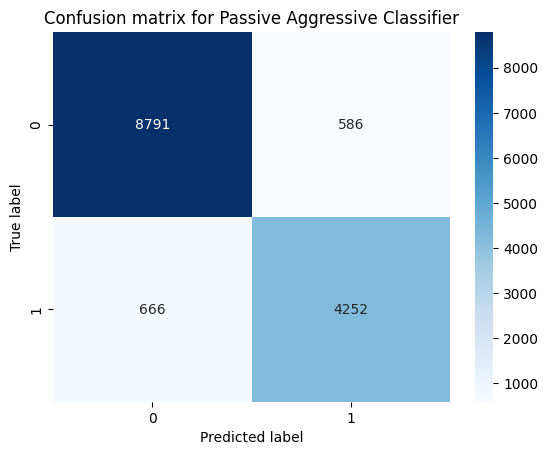

In [ ]:
# Confusion matrix for the test set predictions and true labels
cm_pac = confusion_matrix(y_test, pred_test_pac)

# Plot confusion matrix as heatmap
sns.heatmap(cm_pac, annot=True, cmap='Blues', fmt='d')
# The title, x-label, and y-label of the confusion matrix plot are set and the plot is displayed using plt.show()
plt.title('Confusion matrix for Passive Aggressive Classifier')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Deep Learning Models

In [27]:
# Text preprocessing
max_words = 5000
tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(X_train)

In [28]:
# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [29]:
# Padding
max_len = max(len(x) for x in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [30]:
# Label encoding
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

#### LSTM

In [ ]:
def create_model_lstm():
    model = Sequential()
    model.add(Embedding(max_words, 64, input_length=max_len))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model_lstm = KerasClassifier(build_fn=create_model_lstm)
param_grid_lstm = {'epochs': [5,10], 'batch_size': [32,64]}
grid_lstm = GridSearchCV(model_lstm, param_grid_lstm, cv=5)
grid_lstm.fit(X_train_pad, y_train_enc)
print("Parameters for LSTM: ", grid_lstm.best_params_)

pred_train_lstm = grid_lstm.predict(X_train_pad)
pred_test_lstm = grid_lstm.predict(X_test_pad)
print("LSTM classification report:\n", classification_report(y_test_enc, pred_test_lstm))

train_score_lstm = accuracy_score(pred_train_lstm, y_train)
test_score_lstm = accuracy_score(pred_test_lstm, y_test)

print("LSTM train accuracy:", train_score_lstm)
print("LSTM test accuracy:", test_score_lstm)

<ipython-input-33-1d5a97db7133>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_lstm = KerasClassifier(build_fn=create_model_lstm)


Epoch 1/5
1430/1430 [==============================] - 42s 27ms/step - loss: 0.3548 - accuracy: 0.8394
Epoch 2/5
1430/1430 [==============================] - 39s 27ms/step - loss: 0.2201 - accuracy: 0.9125
Epoch 3/5
1430/1430 [==============================] - 39s 27ms/step - loss: 0.1830 - accuracy: 0.9265
Epoch 4/5
1430/1430 [==============================] - 38s 27ms/step - loss: 0.1561 - accuracy: 0.9373
Epoch 5/5
358/358 [==============================] - 2s 6ms/step - loss: 0.2579 - accuracy: 0.9059
Epoch 1/5
1430/1430 [==============================] - 42s 27ms/step - loss: 0.4821 - accuracy: 0.7981
Epoch 2/5
1430/1430 [==============================] - 38s 27ms/step - loss: 0.2827 - accuracy: 0.8893
Epoch 3/5
1430/1430 [==============================] - 38s 27ms/step - loss: 0.2171 - accuracy: 0.9161
Epoch 4/5
1430/1430 [==============================] - 38s 27ms/step - loss: 0.1882 - accuracy: 0.9260
Epoch 5/5
358/358 [==============================] - 3s 6ms/step - loss: 0.25

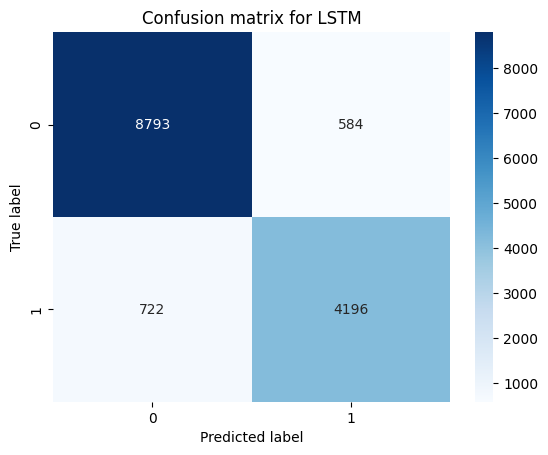

In [ ]:
# Confusion matrix for the test set predictions and true labels
cm_lstm = confusion_matrix(y_test, pred_test_lstm)

# Plot confusion matrix as heatmap
sns.heatmap(cm_lstm, annot=True, cmap='Blues', fmt='d')
# The title, x-label, and y-label of the confusion matrix plot are set and the plot is displayed using plt.show()
plt.title('Confusion matrix for LSTM')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#### Bidirectional LSTM

In [ ]:
# Bidirectional LSTM
def create_model_bilstm():
    model = Sequential()
    model.add(Embedding(max_words, 64, input_length=max_len))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model_bilstm = KerasClassifier(build_fn=create_model_bilstm)
param_grid_bilstm = {'epochs': [5,10], 'batch_size': [32,64]}
grid_bilstm = GridSearchCV(model_bilstm, param_grid_bilstm, cv=5)
grid_bilstm.fit(X_train_pad, y_train_enc)
print("Parameters for Bidirectional LSTM: ", grid_bilstm.best_params_)

pred_train_bilstm = grid_bilstm.predict(X_train_pad)
pred_test_bilstm = grid_bilstm.predict(X_test_pad)
print("Bidirectional LSTM classification report:\n", classification_report(y_test_enc, pred_test_bilstm))

train_score_bilstm = accuracy_score(pred_train_bilstm, y_train)
test_score_bilstm = accuracy_score(pred_test_bilstm, y_test)

print("Bidirectional LSTM train accuracy:", train_score_bilstm)
print("Bidirectional LSTM test accuracy:", test_score_bilstm)

<ipython-input-36-156970a8975a>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_bilstm = KerasClassifier(build_fn=create_model_bilstm)


Epoch 1/5
1430/1430 [==============================] - 67s 42ms/step - loss: 0.2830 - accuracy: 0.8763
Epoch 2/5
1430/1430 [==============================] - 53s 37ms/step - loss: 0.1921 - accuracy: 0.9213
Epoch 3/5
1430/1430 [==============================] - 53s 37ms/step - loss: 0.1598 - accuracy: 0.9347
Epoch 4/5
1430/1430 [==============================] - 54s 38ms/step - loss: 0.1352 - accuracy: 0.9457
Epoch 5/5
358/358 [==============================] - 4s 10ms/step - loss: 0.2814 - accuracy: 0.9035
Epoch 1/5
1430/1430 [==============================] - 57s 36ms/step - loss: 0.2835 - accuracy: 0.8762
Epoch 2/5
1430/1430 [==============================] - 53s 37ms/step - loss: 0.1918 - accuracy: 0.9217
Epoch 3/5
1430/1430 [==============================] - 53s 37ms/step - loss: 0.1598 - accuracy: 0.9351
Epoch 4/5
1430/1430 [==============================] - 52s 36ms/step - loss: 0.1355 - accuracy: 0.9452
Epoch 5/5
358/358 [==============================] - 4s 9ms/step - loss: 0.3

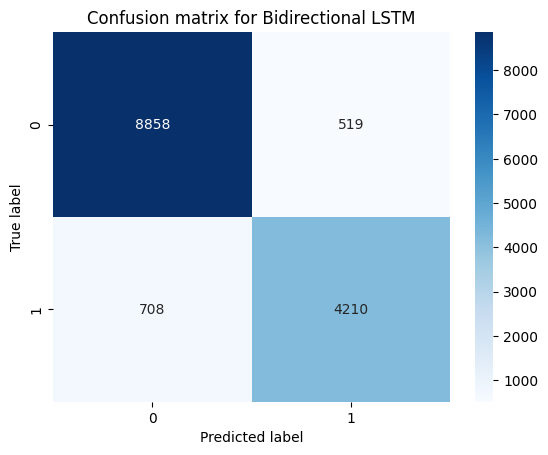

In [ ]:
# Confusion matrix for the test set predictions and true labels
cm_bilstm = confusion_matrix(y_test, pred_test_bilstm)

# Plot confusion matrix as heatmap
sns.heatmap(cm_bilstm, annot=True, cmap='Blues', fmt='d')
# The title, x-label, and y-label of the confusion matrix plot are set and the plot is displayed using plt.show()
plt.title('Confusion matrix for Bidirectional LSTM')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#### RNN

In [31]:
# RNN
def create_model_rnn():
    model = Sequential()
    model.add(Embedding(max_words, 64, input_length=max_len))
    model.add(SimpleRNN(64, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model_rnn = KerasClassifier(build_fn=create_model_rnn)
param_grid_rnn = {'epochs': [5,10], 'batch_size': [32,64]}
grid_rnn = GridSearchCV(model_rnn, param_grid_rnn, cv=5)
grid_rnn.fit(X_train_pad, y_train_enc)
print("Parameters for RNN: ", grid_rnn.best_params_)

pred_train_rnn = grid_rnn.predict(X_train_pad)
pred_test_rnn = grid_rnn.predict(X_test_pad)
print("RNN classification report:\n", classification_report(y_test_enc, pred_test_rnn))

train_score_rnn = accuracy_score(pred_train_rnn, y_train)
test_score_rnn = accuracy_score(pred_test_rnn, y_test)

print("RNN train accuracy:", train_score_rnn)
print("RNN test accuracy:", test_score_rnn)

<ipython-input-31-0d09bd712be6>:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_rnn = KerasClassifier(build_fn=create_model_rnn)


Epoch 1/5
1430/1430 [==============================] - 21s 13ms/step - loss: 0.6421 - accuracy: 0.6601
Epoch 2/5
1430/1430 [==============================] - 18s 13ms/step - loss: 0.6315 - accuracy: 0.6763
Epoch 3/5
1430/1430 [==============================] - 19s 13ms/step - loss: 0.6315 - accuracy: 0.6758
Epoch 4/5
1430/1430 [==============================] - 18s 13ms/step - loss: 0.6307 - accuracy: 0.6771
Epoch 5/5
358/358 [==============================] - 2s 4ms/step - loss: 0.6335 - accuracy: 0.6710
Epoch 1/5
1430/1430 [==============================] - 20s 13ms/step - loss: 0.6491 - accuracy: 0.6516
Epoch 2/5
1430/1430 [==============================] - 18s 13ms/step - loss: 0.5425 - accuracy: 0.7382
Epoch 3/5
1430/1430 [==============================] - 18s 12ms/step - loss: 0.4647 - accuracy: 0.7959
Epoch 4/5
1430/1430 [==============================] - 18s 13ms/step - loss: 0.4255 - accuracy: 0.8196
Epoch 5/5
358/358 [==============================] - 2s 4ms/step - loss: 0.45

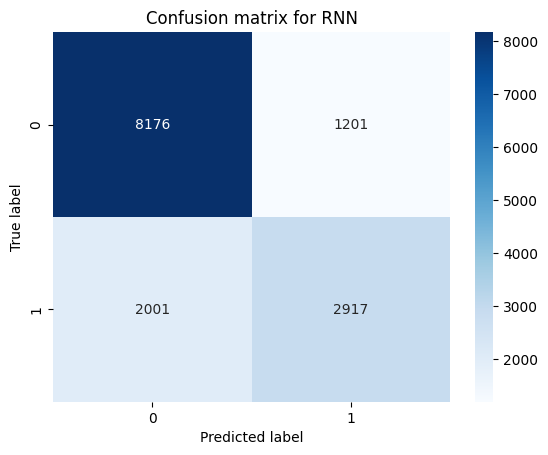

In [32]:
# Confusion matrix for the test set predictions and true labels
cm_rnn = confusion_matrix(y_test, pred_test_rnn)

# Plot confusion matrix as heatmap
sns.heatmap(cm_rnn, annot=True, cmap='Blues', fmt='d')
# The title, x-label, and y-label of the confusion matrix plot are set and the plot is displayed using plt.show()
plt.title('Confusion matrix for RNN')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()